In [12]:
%pip install -r requirements.txt

  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
  Using cached httpcore-1.0.7-py3-none-any.whl.metadata (21 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl.metadata (6.5 kB)
   ---------------------------------------- 0.0/13.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.6/13.1 MB 8.4 MB/s eta 0:00:02
   ----------- ---------------------------- 3.7/13.1 MB 9.1 MB/s eta 0:00:02
   ------------------- -------------------- 6.3/13.1 MB 10.2 MB/s eta 0:00:01
   ----------------------- ---------------- 7.9/13.1 MB 9.5 MB/s eta 0:00:01
   ------------------------------- -------- 10.5/13.1 MB 9.9 MB/s eta 0:00:01
   -------------------------------

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [63]:
df = pd.read_csv('zomato.csv', encoding='latin-1')
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [64]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [66]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## Things to do in Data Analysis
1. Missing values
2. Explore about the Numerical variables
3. Explore about the Categorical variables
4. Finding relationship among features

In [67]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [68]:
print([features for features in df.columns if df[features].isnull().sum()>0])

['Cuisines']


<Axes: >

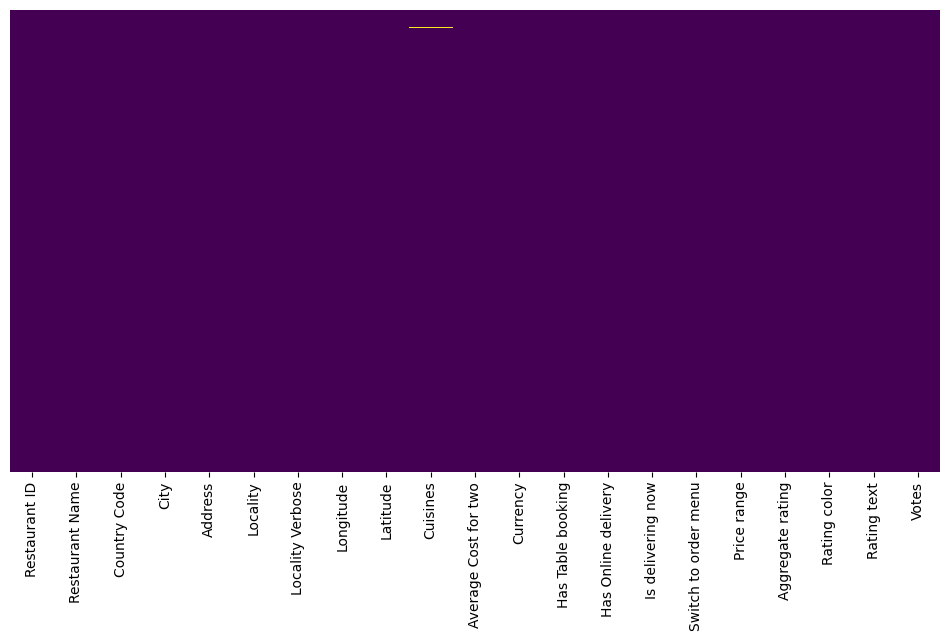

In [80]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [70]:
df_countries = pd.read_excel('Country-Code.xlsx')
df_countries.head(5)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [114]:
final_df = pd.merge(df, df_countries, on='Country Code', how='left')
final_df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [72]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [73]:
final_df.Country.value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [74]:
country_names = final_df.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'South Africa',
       'UAE', 'New Zealand', 'Turkey', 'Australia', 'Phillipines', 'Indonesia',
       'Qatar', 'Singapore', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

In [75]:
country_values = final_df.Country.value_counts().values
country_values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

([<matplotlib.patches.Wedge at 0x1ff45ef8980>,
 [Text(0.600024750722466, -0.9219383376996765, 'India'),
  Text(-0.4525573082051951, 1.0025925806578007, 'United States'),
  Text(-0.6148058784802475, 0.9121478672814685, 'United Kingdom'),
  Text(-0.6561437426320099, 0.8828790341858045, 'Brazil'),
  Text(-0.6904722928734376, 0.8562990206546415, 'South Africa'),
  Text(-0.7237252205374468, 0.8283850585072284, 'UAE'),
  Text(-0.7505770406997889, 0.8041356266043356, 'New Zealand'),
  Text(-0.7699259406300447, 0.7856297129977589, 'Turkey'),
  Text(-0.7847726255751096, 0.7707995369406686, 'Australia'),
  Text(-0.7963460355036786, 0.7588366041102486, 'Phillipines'),
  Text(-0.8069982534126268, 0.7474983739038968, 'Indonesia'),
  Text(-0.8170052593694269, 0.7365476265406709, 'Qatar'),
  Text(-0.8266256363182417, 0.7257341506236717, 'Singapore'),
  Text(-0.8361022208849143, 0.7147958283533237, 'Sri Lanka'),
  Text(-0.8417190751436404, 0.7081730004309221, 'Canada')],
 [Text(0.32728622766679955, -0

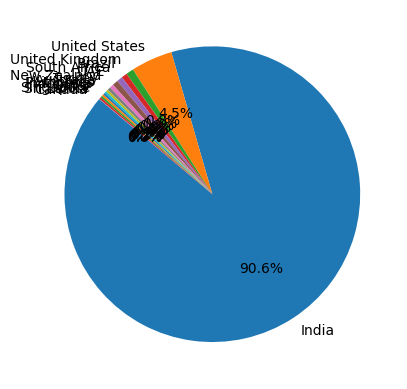

In [76]:
plt.pie(country_values, labels=country_names, autopct='%1.1f%%', startangle=140)

([<matplotlib.patches.Wedge at 0x1ff49eb0ef0>,
 [Text(0.705685512852358, -0.843805639321227, 'India'),
  Text(-0.682287057046067, 0.8628350779769082, 'United States'),
  Text(-0.8229468884593604, 0.7299030201164106, 'United Kingdom')],
 [Text(0.3849193706467407, -0.4602576214479419, '94.39%'),
  Text(-0.37215657657058193, 0.4706373152601317, '4.73%'),
  Text(-0.44888012097783286, 0.3981289200634967, '0.87%')])

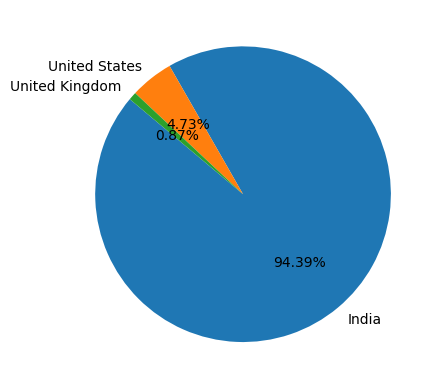

In [77]:
# Pie chart of top 3 countries that uses zomato
plt.pie(country_values[:3], labels=country_names[:3], autopct='%1.2f%%', startangle=140)

### Observation
Zomato's most number of transaction happens in India, then in US, and then in UK

In [115]:
ratings = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0: 'Rating Count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


### Observation
1. 0 rating -> White | Not rated
2. 1.8 - 2.4 rating -> Red | Poor
3. 2.5 - 3.4 rating -> Orange | Average
4. 3.5 - 3.9 rating -> Yellow | Good
5. 4.0 - 4.4 rating -> Green | Good
6. 4.5 - 4.9 rating -> Dark Green | Excellent


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

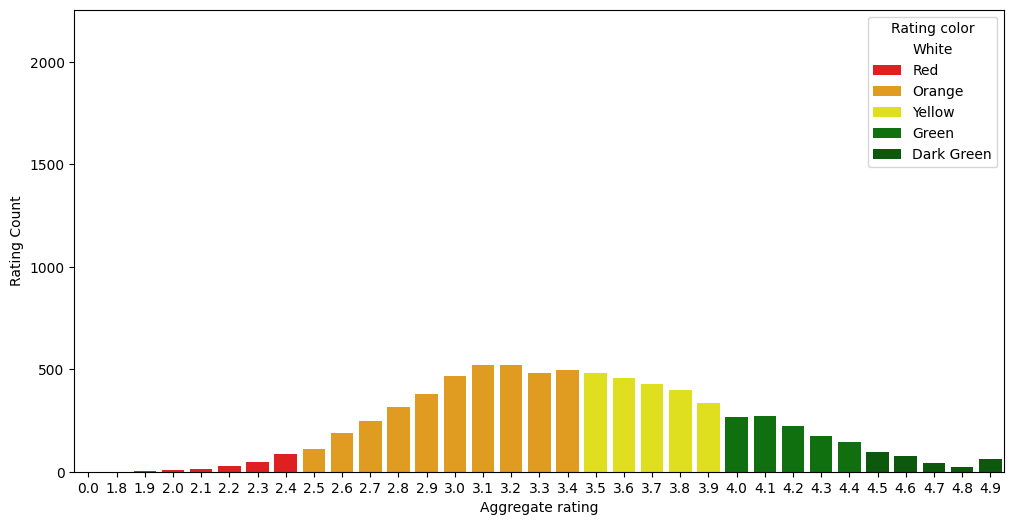

In [116]:
matplotlib.rcParams['figure.figsize'] =(12, 6)
sns.barplot(x='Aggregate rating', y='Rating Count', data=ratings, hue='Rating color', palette=['white', 'red', 'orange', 'yellow', 'green', 'darkgreen'])

### Observation
1. Not rated count is very high.
2. Maximum number of ratings are between 2.5 to 3.4

C:\Users\akashanup\AppData\Local\Temp\ipykernel_4356\3066067690.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating color', data=ratings, palette=['white', 'red', 'orange', 'yellow', 'green', 'darkgreen'])


<Axes: xlabel='Rating color', ylabel='count'>

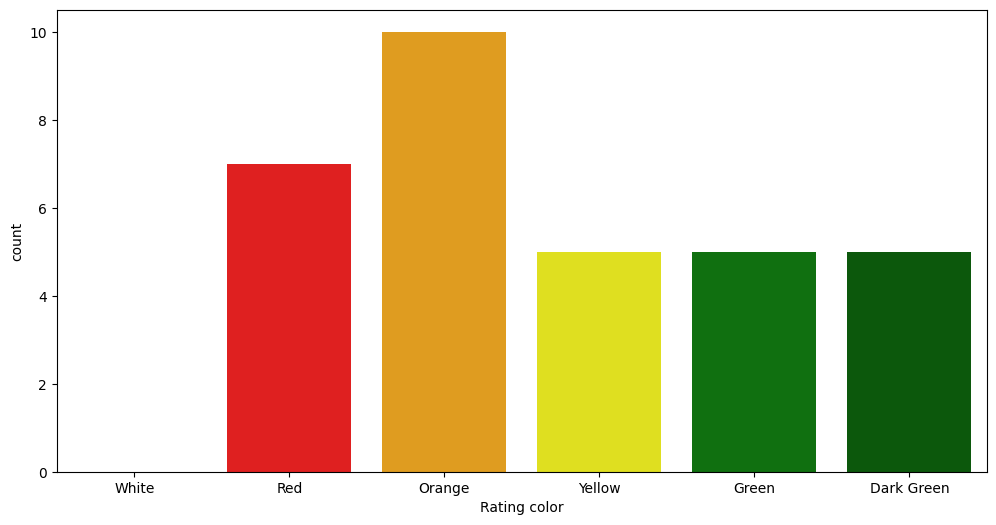

In [117]:
sns.countplot(x='Rating color', data=ratings, palette=['white', 'red', 'orange', 'yellow', 'green', 'darkgreen'])

In [123]:
# Find the countries that have given 0 rating
zero_rated_countries = final_df[final_df['Rating color'] == 'White'].groupby('Country').size().reset_index().rename(columns={0: 'Zero Rating Count'}).sort_values(by='Zero Rating Count', ascending=False)
zero_rated_countries

,Country,Zero Rating Count
1,India,2139
0,Brazil,5
3,United States,3
2,United Kingdom,1


### Observation
1. Maximum number of zero ratings is from India

In [126]:
# Find out which currency is used by which country
currency_used = final_df[['Country', 'Currency']].groupby(['Country', 'Currency']).size().reset_index().rename(columns={0: 'Count'})
currency_used

,Country,Currency,Count
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [133]:
# Find out which countries do have online order option
online_order_countries = final_df[final_df['Has Online delivery'] == 'Yes'].Country.value_counts().reset_index()
online_order_countries

,Country,count
0,India,2423
1,UAE,28


In [136]:
# Find out whether countries do/do not have online order option
online_order = final_df[['Country', 'Has Online delivery']].groupby(['Country', 'Has Online delivery']).size().reset_index().rename(columns={0: 'Count'}).sort_values(by='Country', ascending=True)  
online_order

,Country,Has Online delivery,Count
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


### Observation
1. Online deliveries are available in India and UAE
2. For both India and UAE, online deliveries are not available in some regions

([<matplotlib.patches.Wedge at 0x1ff51499be0>,
 [Text(-0.1156733724937851, -1.093901124826149, 'New Delhi'),
  Text(0.6581529305149211, 0.8813822780466043, 'Gurgaon'),
  Text(-0.24810336557213142, 1.0716551310901197, 'Noida'),
  Text(-0.7527545290103409, 0.802097636858768, 'Faridabad'),
  Text(-0.8356200813981722, 0.7153594058682056, 'Ghaziabad')],
 [Text(-0.06309456681479188, -0.596673340814263, '68.9%'),
  Text(0.35899250755359324, 0.4807539698436023, '14.1%'),
  Text(-0.13532910849388985, 0.5845391624127925, '13.6%'),
  Text(-0.41059337946018587, 0.4375078019229643, '3.2%'),
  Text(-0.45579277167173027, 0.39019603956447574, '0.3%')])

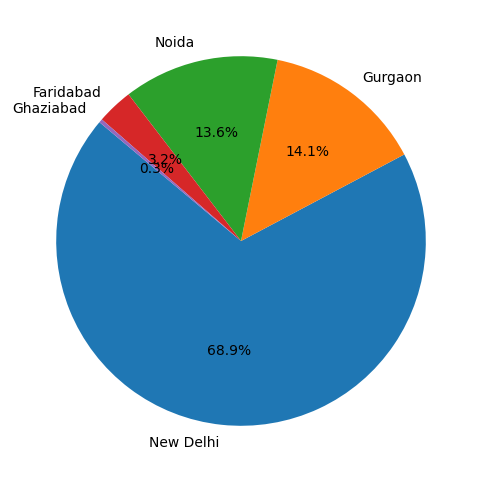

In [139]:
# Create a pie chart for cities distribution
city_names = final_df.City.value_counts().index
city_names
city_values = final_df.City.value_counts().values
city_values
plt.pie(city_values[:5], labels=city_names[:5], autopct='%1.1f%%', startangle=140)

In [141]:
# Find the top 10 cousines
top_cousines = final_df.Cuisines.value_counts().reset_index().head(10)
top_cousines


,Cuisines,count
0,North Indian,936
1,"North Indian, Chinese",511
2,Chinese,354
3,Fast Food,354
4,"North Indian, Mughlai",334
5,Cafe,299
6,Bakery,218
7,"North Indian, Mughlai, Chinese",197
8,"Bakery, Desserts",170
9,Street Food,149
